In [1]:
library(forecast)

In [2]:
training_dataset = read.csv("../../dengueData/SanJuan/san_juan_training_data.csv")
training_dataset

season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases
1990/1991,1,1990-04-30,0,0,0,0,4,0,4
1990/1991,2,1990-05-07,0,0,0,0,5,0,5
1990/1991,3,1990-05-14,0,0,0,0,4,0,4
1990/1991,4,1990-05-21,0,0,0,0,3,0,3
1990/1991,5,1990-05-28,0,0,0,0,6,0,6
1990/1991,6,1990-06-04,1,0,0,0,1,0,2
1990/1991,7,1990-06-11,0,0,0,0,4,0,4
1990/1991,8,1990-06-18,0,0,0,0,5,0,5
1990/1991,9,1990-06-25,2,0,0,0,8,0,10
1990/1991,10,1990-07-02,0,0,0,1,5,0,6


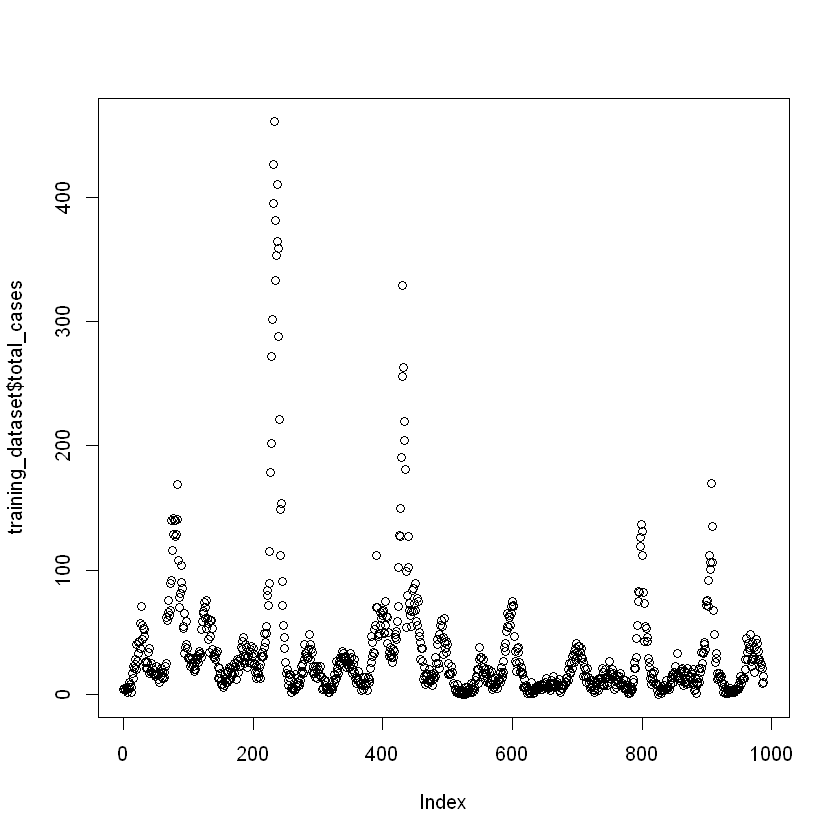

In [3]:
plot(training_dataset$total_cases)

In [4]:
testing_dataset = read.csv("../../dengueData/SanJuan/san_juan_testing_data.csv")
testing_length = nrow(testing_dataset)
testing_length

[1] 1196

In [11]:
split_index = nrow(training_dataset)
window_size = 4
lag_weeks = 2
train = testing_dataset$total_cases[1:(split_index - lag_weeks + 1)]
test = testing_dataset$total_cases[(split_index+1):(nrow(testing_dataset))]
length(train)
length(test)

print(train[690:695])
print(test[1:5])

[1] 987

[1] 208

[1] 18 25 21 31 32 26
[1] 13 11 10  6 11


In [18]:
endIndex = length(test)
trainIndex = length(train)

predictions = numeric(0)
for (index in 1:endIndex){
    fit <- auto.arima(testing_dataset$total_cases[1:trainIndex+index-1], seasonal=TRUE)
    fcast <- forecast(fit, h=1)
    forecasted_data <- data.frame(fcast)
    predictions[index] <- forecasted_data$Point.Forecast[1]
}

In [19]:
length(predictions)

[1] 208

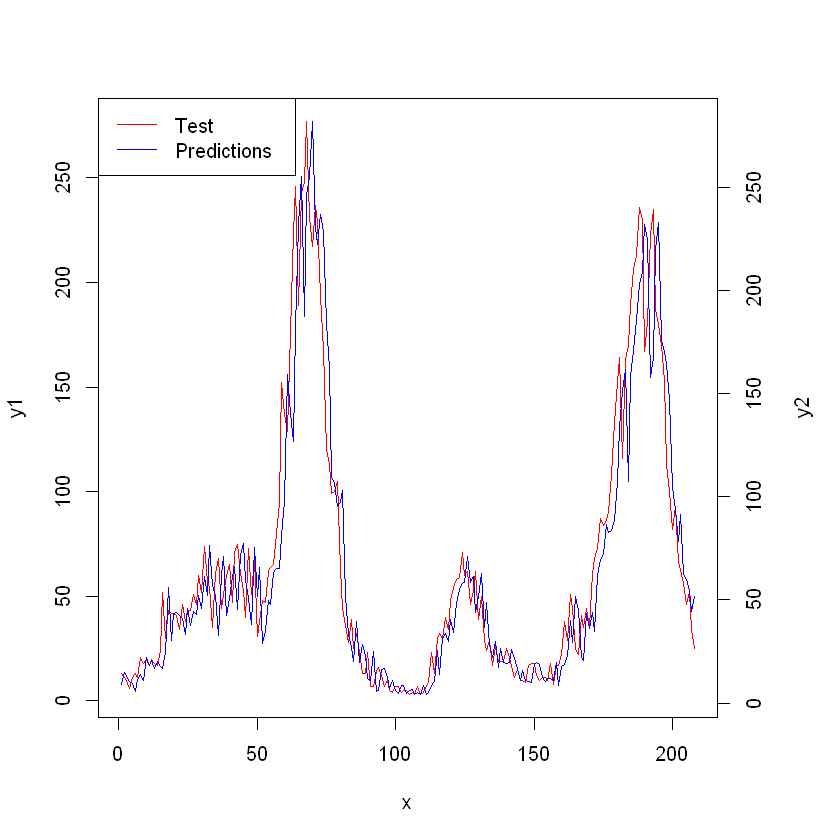

In [20]:

x <- 1:endIndex
y1 <- test
y2 <- predictions
par(mar=c(5,4,4,5)+.1)
plot(x,y1,type="l",col="red")
par(new=TRUE)
plot(x, y2,,type="l",col="blue",xaxt="n",yaxt="n",xlab="",ylab="")
axis(4)
mtext("y2",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("Test","Predictions"))

In [21]:
library(MLmetrics)
mse = MSE(predictions, test)
mse

[1] 550.164

In [10]:
df <- data.frame(test, predictions)